# Análisis Exploratorio de Datos

En presente notebook, se buscará una correlación entre variables de nuestro dataset, buscando reducir la cantidad de variables así quedarnos solo con las relevantes.

In [2]:
import pandas as pd

df = pd.read_csv('train.csv')

df = df.drop(columns=['ID'])

### Analicemos la matriz de correlación


In [3]:
corr_matrix = df.corr()
corr_matrix

,CHD_OR_MI,SEX,AGE,HEALTH,PHYSICAL_HEALTH,MENTAL_HEALTH,PHYSICAL_ACTIVITIES,BLOOD_PRESSURE,HIGH_CHOLESTEROL,SKIN_CANCER,...,DIFFICULTY_WALKING,SMOKE,TABACCO_PRODUCTS,E_CIGARETTES,HEAVY_DRINKERS,HIV,FRUITS,VEGETABLES,FRIED_POTATOES,ETHNICITY
CHD_OR_MI,1.000000,0.071103,-0.225322,-0.219629,-0.152926,-0.007364,-0.095303,-0.212952,0.170687,0.091919,...,0.201933,0.109667,0.003289,-0.014002,0.027429,-0.020797,-0.003845,-0.017577,-0.022453,0.033409
SEX,0.071103,1.000000,0.065068,0.015621,0.056089,0.114928,0.057806,-0.040549,0.021098,0.009962,...,-0.071837,0.080650,0.144296,0.035008,-0.009658,0.011846,-0.059462,-0.052992,0.127572,-0.012326
AGE,-0.225322,0.065068,1.000000,0.131151,0.065402,-0.230841,0.120557,0.380221,-0.279829,-0.262736,...,-0.251071,-0.134583,0.052331,0.149215,-0.053662,0.217166,-0.087328,-0.034621,0.150599,-0.211513
HEALTH,-0.219629,0.015621,0.131151,1.000000,0.479420,0.206383,0.245546,0.201014,-0.133569,-0.034776,...,-0.412549,-0.131163,-0.009606,-0.010538,-0.023341,-0.045212,0.046675,0.084461,0.032259,0.053325
PHYSICAL_HEALTH,-0.152926,0.056089,0.065402,0.479420,1.000000,0.306424,0.198736,0.139990,-0.108851,-0.033832,...,-0.394945,-0.102072,0.002090,-0.027811,-0.013329,-0.068987,0.037137,0.049481,0.024866,0.000778
MENTAL_HEALTH,-0.007364,0.114928,-0.230841,0.206383,0.306424,1.000000,0.058565,-0.024075,-0.014860,0.046179,...,-0.124306,-0.059617,0.007565,-0.104898,0.051505,-0.142027,0.067657,0.036934,-0.010150,0.019929
PHYSICAL_ACTIVITIES,-0.095303,0.057806,0.120557,0.245546,0.198736,0.058565,1.000000,0.127299,-0.075824,-0.003411,...,-0.279240,-0.091943,-0.008993,-0.006250,-0.017633,0.028319,0.111515,0.136117,0.008156,0.044762
BLOOD_PRESSURE,-0.212952,-0.040549,0.380221,0.201014,0.139990,-0.024075,0.127299,1.000000,-0.287785,-0.108609,...,-0.227215,-0.105807,-0.006735,0.033591,-0.005199,0.053845,0.018512,0.022058,0.030051,-0.065076
HIGH_CHOLESTEROL,0.170687,0.021098,-0.279829,-0.133569,-0.108851,-0.014860,-0.075824,-0.287785,1.000000,0.095054,...,0.132850,0.086318,-0.012485,-0.015979,0.012481,-0.047213,-0.025245,-0.030073,-0.029702,0.054297
SKIN_CANCER,0.091919,0.009962,-0.262736,-0.034776,-0.033832,0.046179,-0.003411,-0.108609,0.095054,1.000000,...,0.067677,0.035850,-0.016586,-0.028487,0.004950,-0.067206,0.033102,0.027654,-0.033974,0.116944


Plotemos nuestra matriz

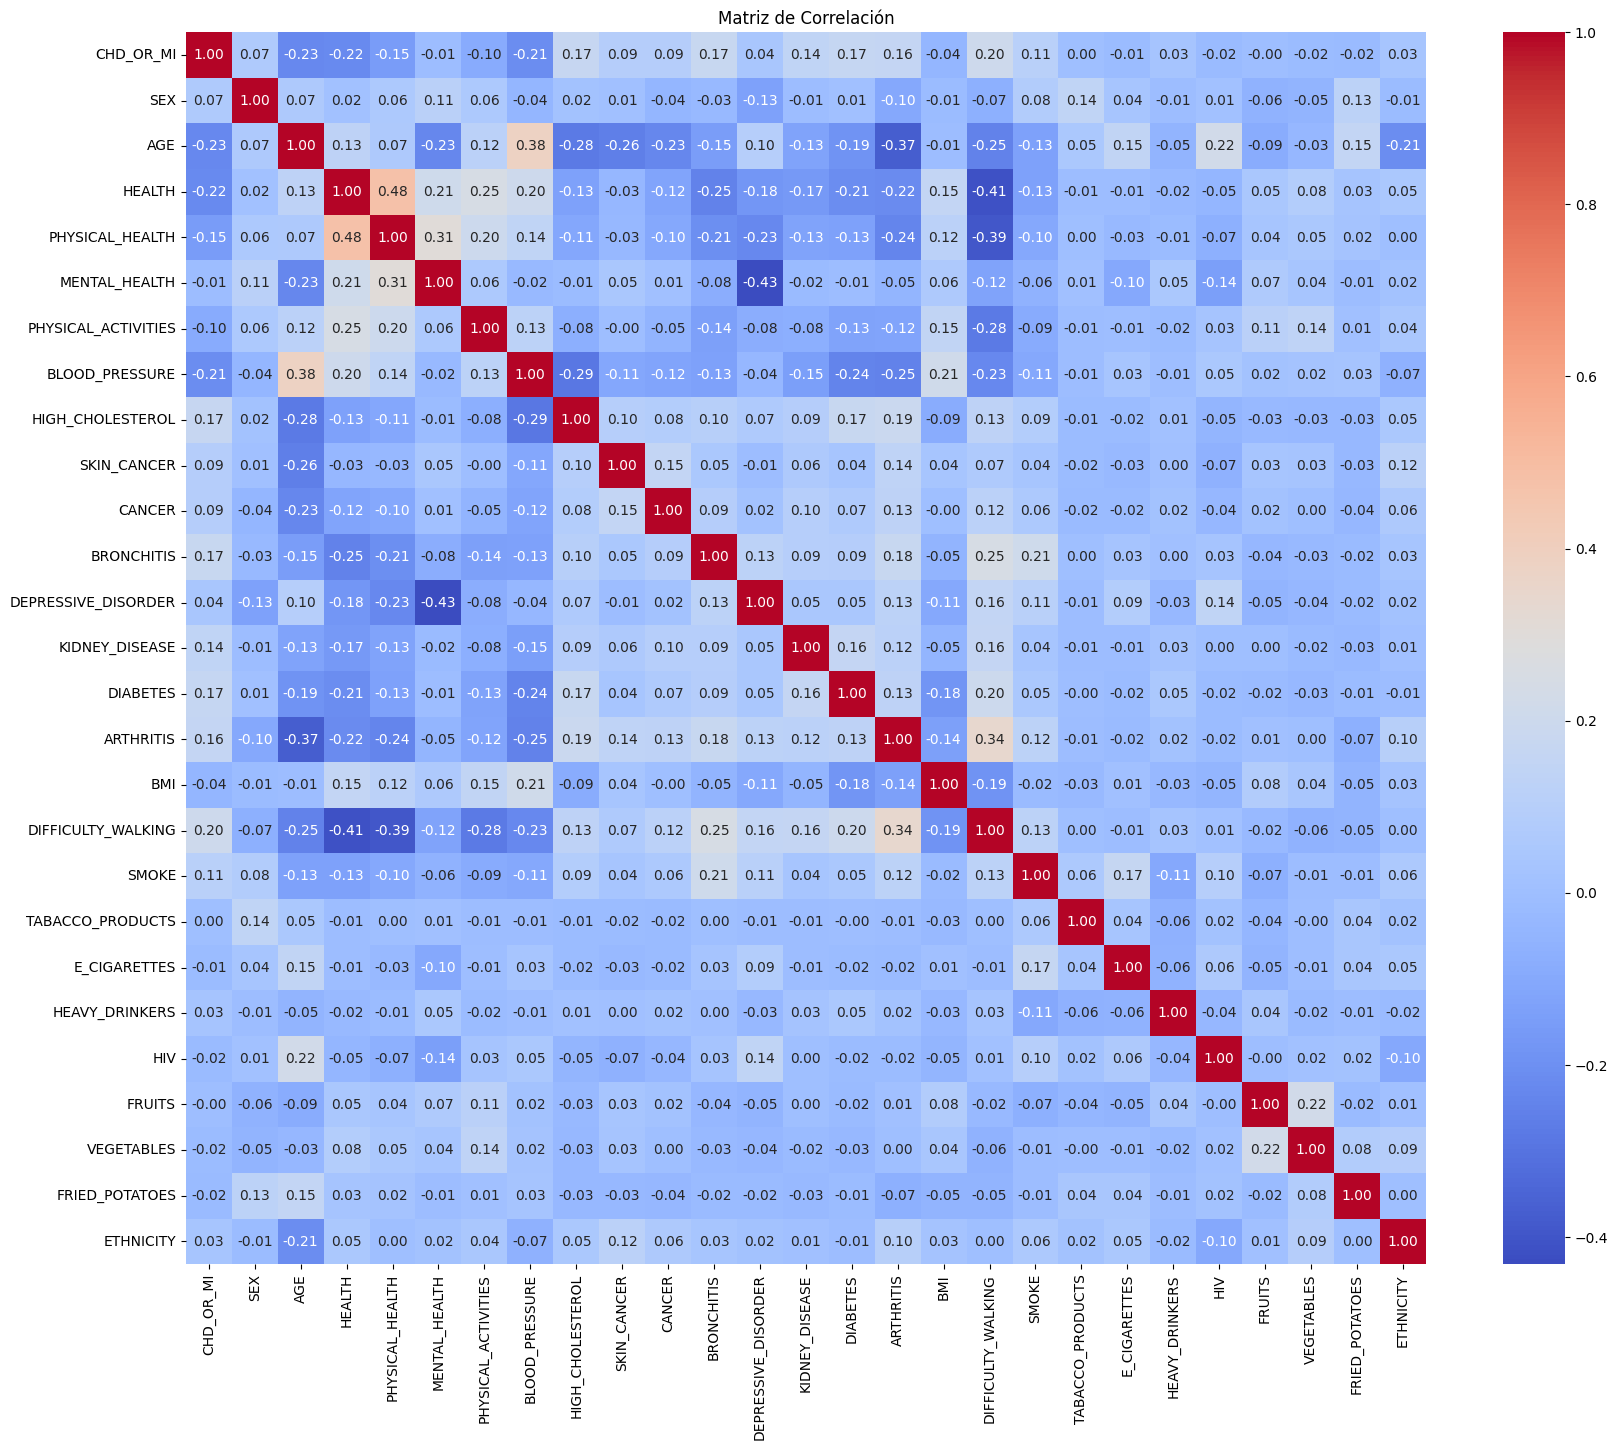

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 16))  # Ajusta el tamaño del gráfico a tu gusto
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

La verdad es que procederé a eliminar la variables en base a se relación en estudios anteriores, así que procederé a eliminar las que por alta correlación indican dependencia lineal, lo cual realmente no aportará de más a nuestros modelos

In [5]:
import numpy as np

threshold = 0.25
# Obtenemos pares (col1, col2) cuya correlación sea > 0.8 (o < -0.8)
high_correlations = np.where((corr_matrix > threshold) | (corr_matrix < -threshold))

# high_correlations es una tupla de índices. Filtramos casos donde i < j (para no duplicar)
high_corr_pairs = [(corr_matrix.index[i], corr_matrix.columns[j]) 
                   for i, j in zip(*high_correlations) 
                   if i < j]

print("Pares de columnas con |correlación| > 0.8:")
for pair in high_corr_pairs:
    print(pair)


Pares de columnas con |correlación| > 0.8:
('AGE', 'BLOOD_PRESSURE')
('AGE', 'HIGH_CHOLESTEROL')
('AGE', 'SKIN_CANCER')
('AGE', 'ARTHRITIS')
('AGE', 'DIFFICULTY_WALKING')
('HEALTH', 'PHYSICAL_HEALTH')
('HEALTH', 'BRONCHITIS')
('HEALTH', 'DIFFICULTY_WALKING')
('PHYSICAL_HEALTH', 'MENTAL_HEALTH')
('PHYSICAL_HEALTH', 'DIFFICULTY_WALKING')
('MENTAL_HEALTH', 'DEPRESSIVE_DISORDER')
('PHYSICAL_ACTIVITIES', 'DIFFICULTY_WALKING')
('BLOOD_PRESSURE', 'HIGH_CHOLESTEROL')
('BLOOD_PRESSURE', 'ARTHRITIS')
('BRONCHITIS', 'DIFFICULTY_WALKING')
('ARTHRITIS', 'DIFFICULTY_WALKING')


Analices el porcentaje de desbalanceo que hay por clase, notando que tenemos 

- Porcentaje de positivos: $91,86$%
- Porcentaje de negativos: $8,14$%

(347246, 27)
CHD_OR_MI
1.0    318988
0.0     28258
Name: count, dtype: int64
Porcentaje de positivos: 0.9186225327289588
Porcentaje de negativos: 0.08137746727104123


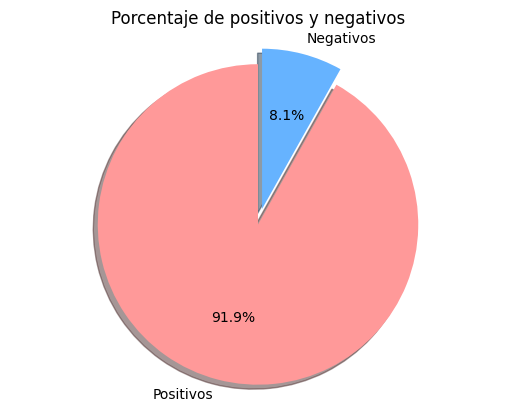

In [6]:
print(df.shape)
print(df["CHD_OR_MI"].value_counts())

print(f"Porcentaje de positivos: {df['CHD_OR_MI'].mean()}")
print(f"Porcentaje de negativos: {1 - df['CHD_OR_MI'].mean()}")

import matplotlib.pyplot as plt

labels = ['Positivos', 'Negativos']
sizes = [df['CHD_OR_MI'].mean(), 1 - df['CHD_OR_MI'].mean()]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
    shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Porcentaje de positivos y negativos')
plt.show()

Trás una búsqueda exhaustiva en estudios sobre enfermedades coronarias y ver como algunas variables son linealmente dependientes, eliminaré las siguientes:

In [7]:
# VAMOS A ELIMINAR: 'SKIN_CANCER', 'PHYSICAL_HEALTH', 'MENTAL_HEALTH', 'TABACCO_PRODUCTS', 'HEAVY_DRINKERS', 'FRIED_POTATOES'
df = df.drop(columns=['SKIN_CANCER', 'PHYSICAL_HEALTH', 'MENTAL_HEALTH', 'TABACCO_PRODUCTS', 'HEAVY_DRINKERS','E_CIGARETTES', 'FRIED_POTATOES','FRUITS','VEGETABLES'])

In [8]:
df.columns

Index(['CHD_OR_MI', 'SEX', 'AGE', 'HEALTH', 'PHYSICAL_ACTIVITIES',
       'BLOOD_PRESSURE', 'HIGH_CHOLESTEROL', 'CANCER', 'BRONCHITIS',
       'DEPRESSIVE_DISORDER', 'KIDNEY_DISEASE', 'DIABETES', 'ARTHRITIS', 'BMI',
       'DIFFICULTY_WALKING', 'SMOKE', 'HIV', 'ETHNICITY'],
      dtype='object')

In [9]:
# Analizamos los valores nulos
missing_columns = df.isnull().sum().sort_values(ascending=False)
missing_columns = missing_columns[missing_columns > 0]
print("Cantidad de valores nulos por columna")
print(missing_columns)


non_missing_columns = df.columns[~df.isnull().any()]
print("Columnas sin valores nulos")
print(non_missing_columns, non_missing_columns.shape)

Cantidad de valores nulos por columna
HIGH_CHOLESTEROL       50191
HIV                    40794
BMI                    36960
SMOKE                  19263
DIFFICULTY_WALKING     15604
ARTHRITIS               1954
DEPRESSIVE_DISORDER     1686
BRONCHITIS              1313
BLOOD_PRESSURE          1307
KIDNEY_DISEASE          1131
HEALTH                   838
CANCER                   792
PHYSICAL_ACTIVITIES      653
DIABETES                 530
dtype: int64
Columnas sin valores nulos
Index(['CHD_OR_MI', 'SEX', 'AGE', 'ETHNICITY'], dtype='object') (4,)


Como se mencionó en el README.md, podemos imputar los datos con la moda para la mayoría de variables a excepción del `BMI`

In [10]:
for column in missing_columns.index:
    if column == 'BMI':
        df[column] = df[column].fillna(df[column].mean())
    else:
        df[column] = df[column].fillna(df[column].mode()[0])


df

,CHD_OR_MI,SEX,AGE,HEALTH,PHYSICAL_ACTIVITIES,BLOOD_PRESSURE,HIGH_CHOLESTEROL,CANCER,BRONCHITIS,DEPRESSIVE_DISORDER,KIDNEY_DISEASE,DIABETES,ARTHRITIS,BMI,DIFFICULTY_WALKING,SMOKE,HIV,ETHNICITY
0,1.0,1,34,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,3421.000000,2.0,2.0,2.0,1
1,0.0,1,76,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2870.000000,2.0,1.0,2.0,1
2,1.0,2,69,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2855.145811,2.0,2.0,2.0,2
3,1.0,2,36,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2855.145811,2.0,2.0,1.0,5
4,1.0,2,21,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,3328.000000,2.0,2.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347241,1.0,1,63,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2414.000000,2.0,1.0,2.0,6
347242,1.0,2,77,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,1980.000000,2.0,2.0,2.0,1
347243,1.0,1,66,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2568.000000,2.0,2.0,2.0,5
347244,1.0,2,79,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,2.0,2480.000000,2.0,2.0,2.0,1
